## Exploratory-Data-Analysis Part 1

#### ----------------------------------------------------------------------------------------------------
#### Set up the proper imports so I have access to the Pandas, Matplotlib, and MySQL Connector Python libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection

#### Use MySQL Connector to establish a connection to my remote data source.
#### HINT: Check the Setup Steps for information about the credentials you will use for connecting

In [88]:
mydb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database='salesdb', user='root', password='D3v$tudent', use_pure=True)

#### Query my database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable

In [89]:
my_query = "SELECT City, Invoice_ID, Customer_Type, Gender, Product_Line, Unit_Price, Quantity, Total, Date, Time, Payment, COGS, Gross_Income, Rating FROM sales JOIN cities ON sales.City_ID = cities.City_ID"

all_sales_df = pd.read_sql_query(my_query, mydb)
all_sales_df.head()

C:\Users\daryl\AppData\Local\Temp\ipykernel_5264\4082221233.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_sales_df = pd.read_sql_query(my_query, mydb)


,City,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating
0,Seattle,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0
1,Milwaukee,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9
2,Milwaukee,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1
3,Milwaukee,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2
4,Seattle,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6


#### Perform the necessary data cleaning and wrangling steps for my DataFrame.  This will include:
#### (1)Exploring the information of the joined DataFrame
#### (2)Checking for and removing null values, if necessary
#### (3)Checking for and removing duplicate rows, if necessary
#### (4)Converting any necessary columns to Pandas DateTime format

In [ ]:
# DONE



#### Explore my DataFrame to examine the spread of values across categories.  I will utilize this exploration to answer the following questions:

In [ ]:
# Q) How many sales were made for members vs. normal customers?
# A) Member sales total at 501 and normal sales total at 499.

# Q) How many sales were made at each store location?
# A)    Seattle          340
#       New York City    332
#       Milwaukee        328

# Q) How many sales were made for each product line?
# A)    Fashion accessories       178
#       Food and beverages        174
#       Electronic accessories    170
#       Sports and travel         166
#       Home and lifestyle        160
#       Health and beauty         152

# Q) What is the overall average rating, based on all sales records?
# A) 6.9727

In [94]:
# How many sales were made for members vs. normal customers?
# print(all_sales_df['Customer_Type'].value_counts()['Member'])
# print(all_sales_df['Customer_Type'].value_counts()['Normal'])

# How many sales were made at each store location?
# all_sales_df['City'].value_counts()

# How many sales were made for each product line?
# all_sales_df['Product_Line'].value_counts()

# What is the overall average rating, based on all sales records?
# average = all_sales_df["Rating"].mean()
# average


6.9727

#### Create three visualizations of my DataFrame to better understand any trends or patterns within my data set.  These charts will be a type of my choosing, and I can select which variables to analyze.  All three charts should contain the following:
#### A chart title
#### X-axis labels, if applicable
#### Y-axis labels, if applicable

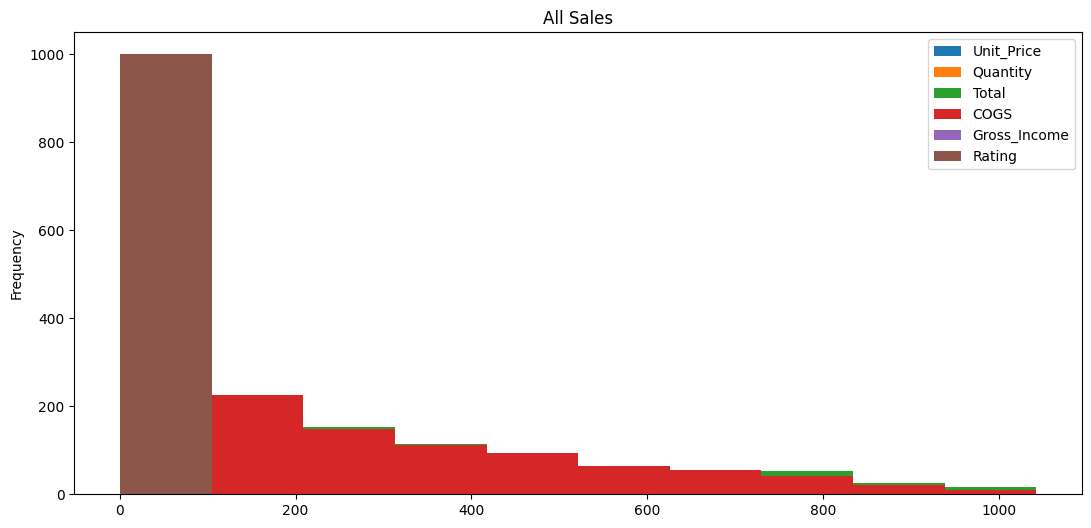

In [95]:
all_sales_df.plot.hist(figsize=(13,6));
plt.title("All Sales");

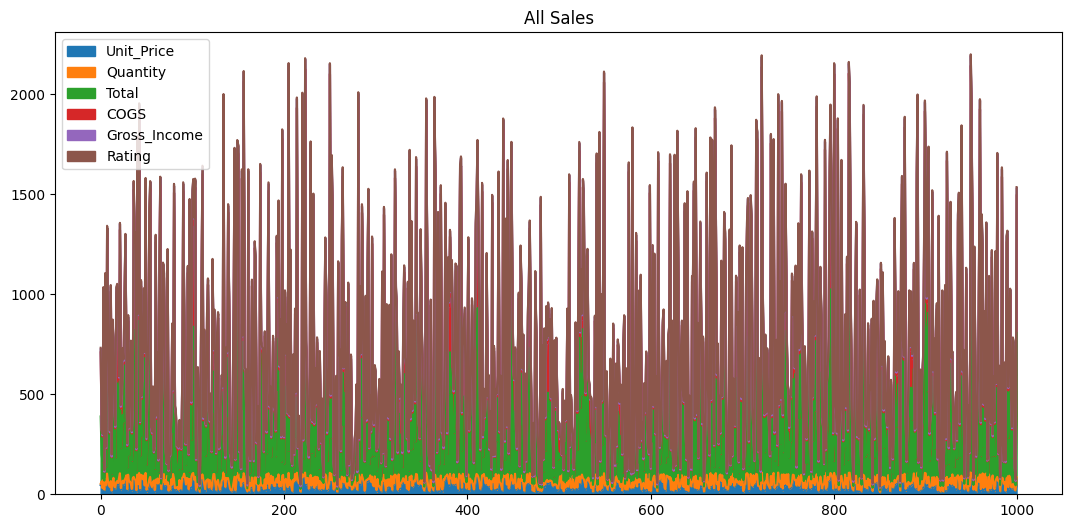

In [96]:
all_sales_df.plot.area(figsize=(13,6));
plt.title("All Sales");

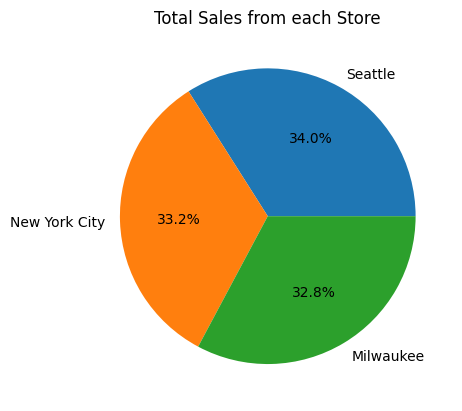

In [106]:
# all_sales_df.plot.bar(figsize=(13,6))
# plt.xlabel("Gross_Income")
# plt.ylabel("City")
# plt.title("All Sales")
# plt.show()

# Q) How many sales were made at each store location?
# A)    Seattle          340
#       New York City    332
#       Milwaukee        328

pie = ([340, 332, 328])
my_labels = "Seattle", "New York City", "Milwaukee"

plt.pie(pie, labels=my_labels, autopct='%1.1f%%')
plt.title("Total Sales from each Store")
plt.show()




-----------------------------------------------------------------------------
### Part2 Stories
### Set up the proper imports so I have access to the scikit-learn Python library

In [107]:
from sklearn.linear_model import LinearRegression

### Describe numeric trends in my DataFrame, using the appropriate Pandas function

In [108]:
all_sales_df.describe()

,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000


### Explore the correlation between columns of my data set, using the appropriate Pandas function

In [109]:
all_sales_df.corr()

C:\Users\daryl\AppData\Local\Temp\ipykernel_5264\2655700030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_sales_df.corr()


,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


### Note the columns with the strongest correlation, and visualize those two columns using a Matplotlib Scatter Plot.  I will ensure my plot includes the following:
#### A chart title
#### An X-axis label
#### A Y-axis label

Text(0.5, 1.0, 'Total and COGS Correlation')

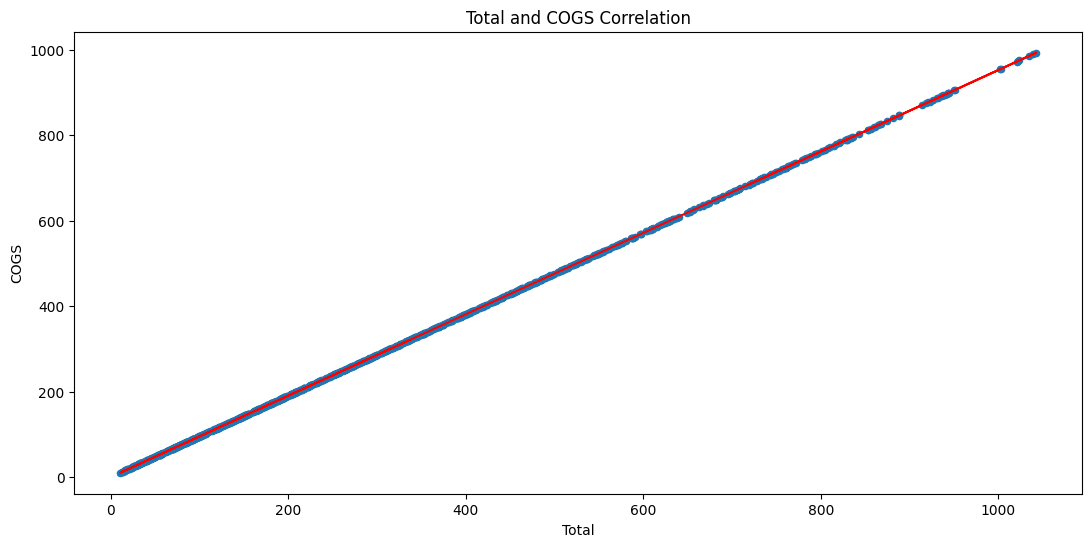

In [123]:
# all_sales_df.head()
model = LinearRegression()

x_values = all_sales_df[["Total"]]
y_values = all_sales_df[["COGS"]]

model.fit(x_values, y_values)
y_prediction_line = model.predict(x_values)

all_sales_df.plot.scatter(x="Total", y="COGS", figsize=(13,6))
plt.plot(x_values, y_prediction_line, color="red")
plt.title("Total and COGS Correlation")

### Reshape my two columns to prepare for fitting to a linear regression model, and save each as its own unique variable

In [116]:
from sklearn.linear_model import LinearRegression

In [121]:
all_sales_df.corr()

C:\Users\daryl\AppData\Local\Temp\ipykernel_5264\2655700030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_sales_df.corr()


,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


In [129]:

reshaped_x = all_sales_df[["Total"]]
reshaped_y = all_sales_df["COGS"]

model = LinearRegression()
model.fit(reshaped_x, reshaped_y)
predicted_y_values = model.predict(reshaped_x)

# figsize=(13,6)
# plt.title("Total and COGS Correlation")


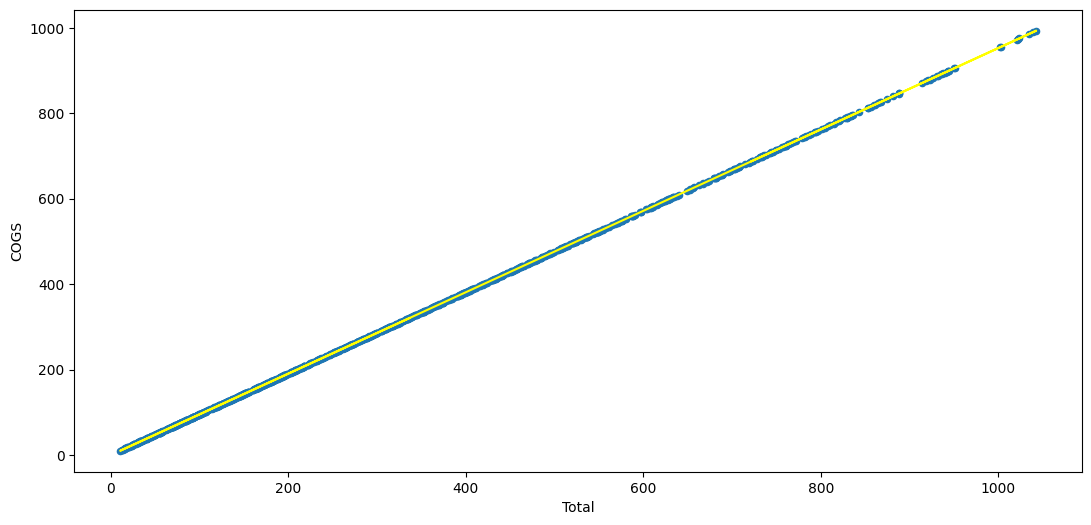

In [150]:
all_sales_df.plot.scatter(x="Total", y="COGS", figsize=(13,6))
plt.plot(reshaped_x, predicted_y_values, color="yellow")

### Create a new LinearRegression instance, and use the appropriate function to create a predictive model for my Y-axis values.

In [145]:
reshaped_x = all_sales_df[["Total"]]
reshaped_y = all_sales_df["COGS"]

model = LinearRegression()
model.fit(reshaped_x, reshaped_y)
predicted_y_values = model.predict(reshaped_x)

y_intercept = model.intercept_
print(f"The y-intercept for our the line is: {y_intercept}")
# y_intercept

The y-intercept for our the line is: -1.1368683772161603e-13


In [146]:
slope = model.coef_
print(f"The slope for our line is: {slope}")

The slope for our line is: [0.95238095]


In [147]:
slope = model.coef_[0]
print(f"The slope for our line is: {slope}")

The slope for our line is: 0.9523809523809527


In [148]:
print(f"Our line of best fit is: Total = {slope} * COGS + {y_intercept}")

Our line of best fit is: Total = 0.9523809523809527 * COGS + -1.1368683772161603e-13


In [ ]:
all_sales_df.plot.scatter(x="Total", y="COGS", figsize=(13,6))
plt.plot(reshaped_x, predicted_y_values, color="red")

#### Create a visualization of my predictive model, and ensure I include the following stylizations:
#### A chart title
#### X-axis label
#### Y-axis label
#### A different color line for my predictive model
#### Present my findings as a Level I-style video recording (informal) that is no more than 5-8 minutes and covers the following:
#### The completed results of your Jupyter notebook
#### Key visualizations generated based off of evaluation questions
#### Any other cleaned/wrangled supporting data 
#### Communicate any insights you’ve gathered by working with the data
#### Make sure to address a specific individual in your video as if you were responding to a request for analysis (you can pick a fictional person or choose an instructor!)